In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error
import copy

1. Зашумить изображение при помощи шума гаусса, постоянного шума.

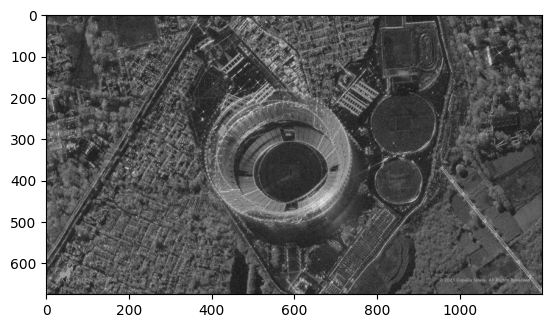

In [3]:
image = cv2.imread('sar_1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

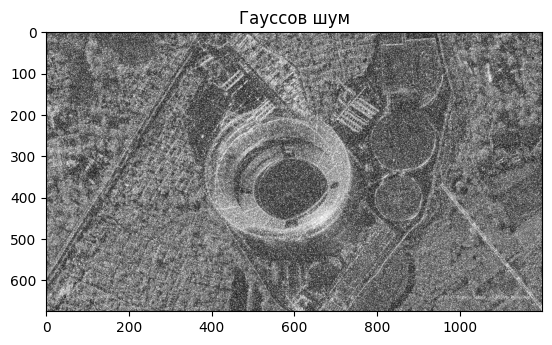

In [5]:
mean = 0
stddev = 100
noise_gauss = np.zeros(image.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)
image_noise_gauss = cv2.add(image,noise_gauss)

plt.imshow(image_noise_gauss, cmap="gray")
plt.title('Гауссов шум')
plt.show()

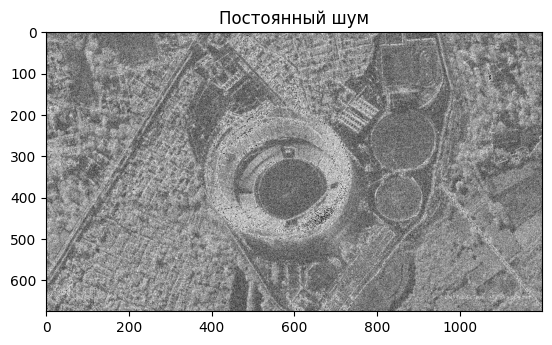

In [18]:
a = 0
b = 120

height, width = image.shape
noise = np.random.uniform(a, b, (height, width))

noisy_image = image.astype(np.float32) + noise
noisy_image = noisy_image.astype(np.uint8)

plt.imshow(noisy_image, cmap="gray")
plt.title('Постоянный шум')
plt.show()

2. Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.

Гаус

In [16]:
image_gauss_median5 = cv2.medianBlur(image_noise_gauss, 5)

image_gauss_gauss3 = cv2.GaussianBlur(image_noise_gauss, (3, 3), 0)

image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss, 9, 50, 50)

image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h=20)

Медианный 5x5: MSE=704.65, SSIM=0.4706
Гаусс 3x3: MSE=1900.52, SSIM=0.4409
Билатеральный 50: MSE=2653.70, SSIM=0.2281
NLM h=20: MSE=4221.64, SSIM=0.1877

Лучший фильтр: Медианный 5x5
MSE: 704.65, SSIM: 0.4706


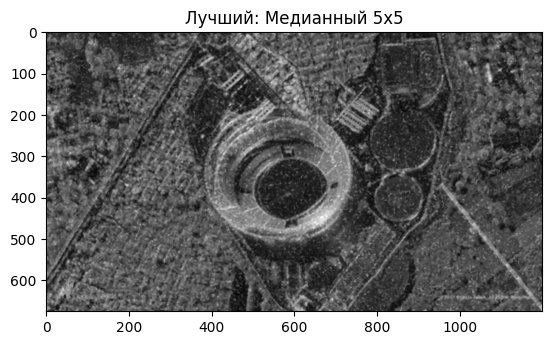

In [23]:
filters_gauss = [
    ('Медианный 5x5', image_gauss_median5),
    ('Гаусс 3x3', image_gauss_gauss3),
    ('Билатеральный 50', image_gauss_bilat),
    ('NLM h=20', image_gauss_nlm)
]

best_mse_gauss = float('inf')
best_ssim_gauss = -1
best_filter_gauss = ""

for name, filtered_image in filters_gauss:
    mse = mean_squared_error(image, filtered_image)
    ssim = structural_similarity(image, filtered_image)

    print(f"{name}: MSE={mse:.2f}, SSIM={ssim:.4f}")

    if mse < best_mse_gauss and ssim > best_ssim_gauss:
        best_mse_gauss = mse
        best_ssim_gauss = ssim
        best_filter_gauss = name

print(f"\nЛучший фильтр: {best_filter_gauss}")
print(f"MSE: {best_mse_gauss:.2f}, SSIM: {best_ssim_gauss:.4f}")

best_gauss_image = next(img for name, img in filters_gauss if name == best_filter_gauss)

plt.imshow(best_gauss_image, cmap='gray')
plt.title(f'Лучший: {best_filter_gauss}')
plt.show()

Постоянный

In [20]:
image_const_median5 = cv2.medianBlur(noisy_image, 5)

image_const_gauss3 = cv2.GaussianBlur(noisy_image, (3, 3), 0)

image_const_bilat = cv2.bilateralFilter(noisy_image, 9, 50, 50)

image_const_nlm = cv2.fastNlMeansDenoising(noisy_image, h=20)

Медианный 5x5: MSE=3762.17, SSIM=0.3862
Гаусс 3x3: MSE=3682.57, SSIM=0.4738
Билатеральный 50: MSE=3944.85, SSIM=0.3819
NLM h=20: MSE=4486.62, SSIM=0.2869

Лучший фильтр: Гаусс 3x3
MSE: 3682.57, SSIM: 0.4738


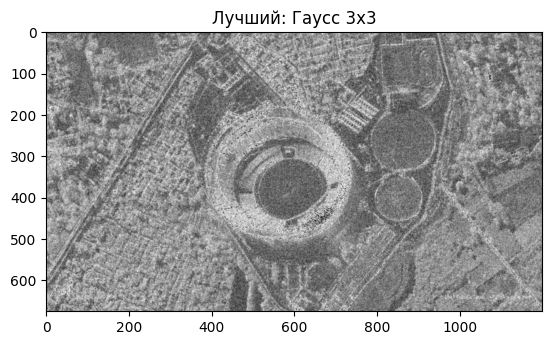

In [24]:
filters_const = [
    ('Медианный 5x5', image_const_median5),
    ('Гаусс 3x3', image_const_gauss3),
    ('Билатеральный 50', image_const_bilat),
    ('NLM h=20', image_const_nlm)
]

best_mse_const = float('inf')
best_ssim_const = -1
best_filter_const = ""

for name, filtered_image in filters_const:
    mse = mean_squared_error(image, filtered_image)
    ssim = structural_similarity(image, filtered_image)

    print(f"{name}: MSE={mse:.2f}, SSIM={ssim:.4f}")

    if mse < best_mse_const and ssim > best_ssim_const:
        best_mse_const = mse
        best_ssim_const = ssim
        best_filter_const = name

print(f"\nЛучший фильтр: {best_filter_const}")
print(f"MSE: {best_mse_const:.2f}, SSIM: {best_ssim_const:.4f}")

best_const_image = next(img for name, img in filters_const if name == best_filter_const)

plt.imshow(best_const_image, cmap='gray')
plt.title(f'Лучший: {best_filter_const}')
plt.show()